In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter.filedialog as tkf
import hyperspy.api as hys
from scipy import optimize

In [14]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape) # row, col
    x = (X*data).sum()/total # row
    y = (Y*data).sum()/total # col
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [2]:
raw_adr = tkf.askopenfilename()
print(raw_adr)

C:/Users/user/Desktop/Ryu/temporary/4D_amorphous/(1) Extr2D of axis-rolled 4D.dm3


In [4]:
one_dif = hys.load(raw_adr)
print(one_dif)

<Signal2D, title: (1) Extr2D of axis-rolled 4D, dimensions: (|128, 128)>


In [5]:
dif = one_dif.data
print(dif.shape)

(128, 128)


In [ ]:
cropped_center = dif[]

In [35]:
y, x = np.indices(dif.shape) # row, col
print(y.shape)
print(x.shape)
print(y)
print(x)

(128, 128)
(128, 128)
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [125 125 125 ... 125 125 125]
 [126 126 126 ... 126 126 126]
 [127 127 127 ... 127 127 127]]
[[  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 ...
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]]


56 56
(16, 16)


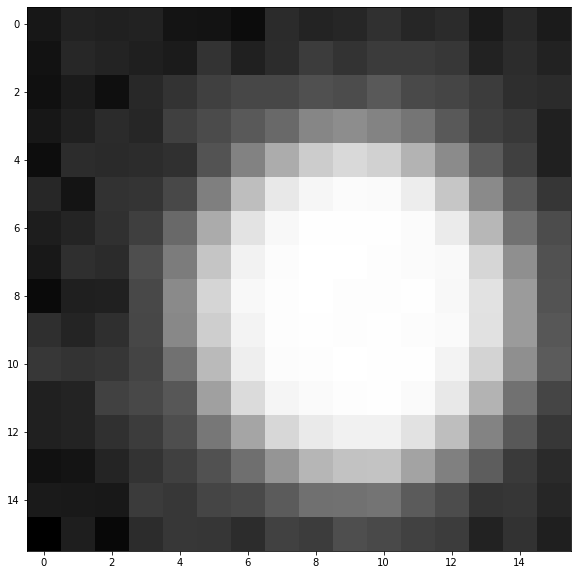

In [36]:
cbox_edge = 16
cbox_outy = int(dif.shape[0]/2 - cbox_edge/2) # row
cbox_outx = int(dif.shape[1]/2 - cbox_edge/2) # col
print(cbox_outy, cbox_outx)
center_box = dif[cbox_outy:-cbox_outy, cbox_outx:-cbox_outx]
print(center_box.shape)
plt.figure(figsize=(10,10))
plt.imshow(center_box)
plt.show()

In [37]:
fit_params = fitgaussian(center_box)
(_, center_y, center_x, _, _) = fit_params
print(center_y, center_x) # row, col
center_fit = [int(round(center_y)+cbox_outy), int(round(center_x)+cbox_outx)]
print(center_fit)

8.17213562282303 8.832992827532145
[64, 65]


In [53]:
r = np.hypot(y - center_fit[0], x - center_fit[1])
print(r.shape)

(128, 128)


In [52]:
%matplotlib qt
plt.figure(figsize=(10,10))
plt.imshow(r)
plt.show()